# 0. Введение.

Привет! Эта лабораторная работа про то, какие есть способы сбора данных с сайтов. Давай начнём с небольшого введения про то, как её выполнять.

В коде и тексте этой лабораторной работы встречаются блоки двух видов. Первый из них будет в ячейках с кодом и выглядит он так:


```
# TODO
```

Это означает, что тут надо написать одну или несколько строчек кода.

Второй тип блоков выглядит так - <font color='violet'> \# TODO </font>. Он означает, что тут надо написать какие-то свои мысли и выводы. Когда будешь писать, пожалуйста, не меняй цвет текста твоего ответа - это упростит проверку.

В тексте внизу собраны все нужные библиотечки - запускаем её и начинаем выполнение лабораторной работы! :)

In [1]:
from urllib.request import urlopen
import urllib
from urllib.parse import urlparse, urldefrag, urljoin
from bs4 import BeautifulSoup
import lxml
import requests
import pandas as pd
import re
import json

# Часть 1. Работа со статическими страницами при помощи bs4. 3 балла.



В этой части вам не нужно работать с маркетплейсами или сложными крупными онлайн-магазинами, достаточно поиграться с **небольшим нишевым магазинчиком**.

Пример сайта, подходящего под задание:
- Семена овощей - Аэлита https://ailita-shop.ru/


Вам нужно найти ПОХОЖИЙ сайт без динамической подгрузки контента (таких в интернете очень много)

Для формирования представления о магазине достаточно посмотреть на товары одной выбранной категории.

На странице товара **должна содержалась следующая информация, которую вам надо будет получить в рамках задания**:

- Название
- Картинка
- Характеристики (минимум 1)
- Описание

Описание должно быть достаточно большим (больше одного предложения) и содержать информацию о характеристиках товара. Например, как это бывает на алиэкспрессе

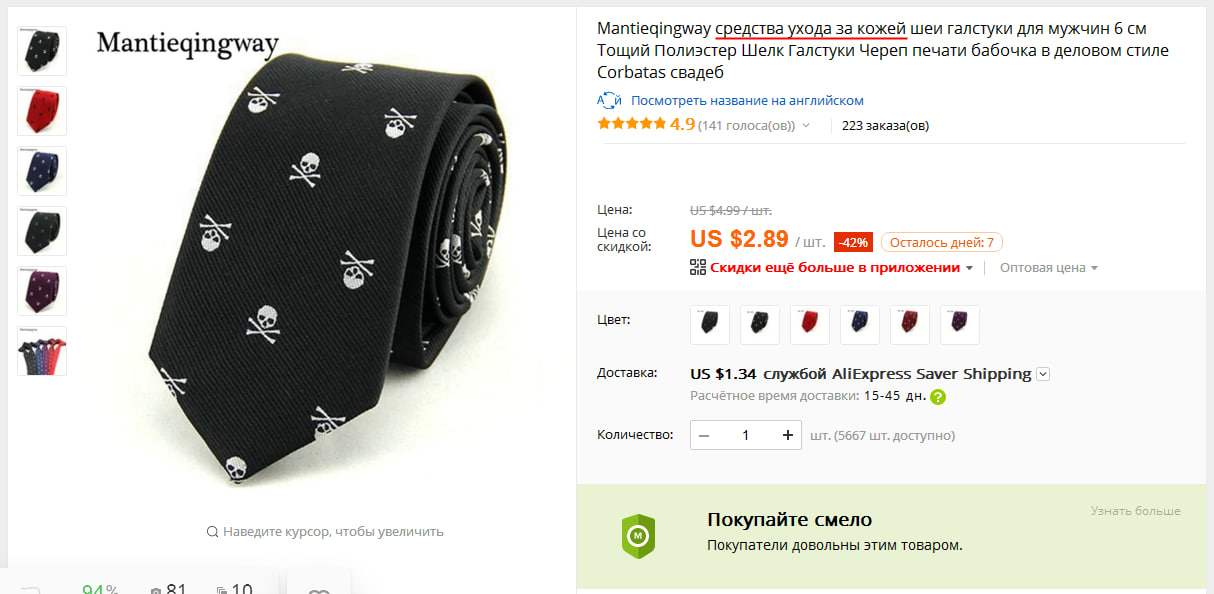

## Исследование

Выберите магазин, который удовлетворяет описанию магазина-конкурента:

<font color='violet'> Бизон Пицца </font>

Выберите категорию товаров и посмотрите на предлагаемые карточки товаров. **Категория должна содержать 20+ карточек, чтобы можно было составить более полное мнение о товарах в магазине.**

In [2]:
url = "https://bizonpizza.ru/"

Откройте ссылку с помощью библиотеки `urllib` и загрузите данные в переменную `html`. Не забудь про кодировку!

In [3]:
response = urllib.request.urlopen(url)
html = response.read()
print(*[x for x in html.split(b'\n')], sep='\n')

b'<!doctype html>'
b'<html data-n-head-ssr lang="ru" itemscope itemtype="http://schema.org/WebPage" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D,%22itemscope%22:%7B%22ssr%22:%22itemscope%22%7D,%22itemtype%22:%7B%22ssr%22:%22http://schema.org/WebPage%22%7D%7D">'
b'  <head >'
b'    <meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" name="facebook-domain-verification" content="avxcbqennzv6tmbidb45xqay27w7wy"><meta data-n-head="ssr" data-hid="og:title" property="og:title" content=""><meta data-n-head="ssr" data-hid="og:description" property="og:description" content=""><meta data-n-head="ssr" data-hid="og:type" property="og:type" content="article"><meta data-n-head="ssr" data-hid="og:url" property="og:url" content="https://bizonpizza.ru/"><meta data-n-head="ssr" data-hid="og:site_name" property="og:site_name" content="https://bizonpizza.ru"><meta data-n-head="ssr" data-hid="og:image" pr

Распарсьте текстовую информация на странице, используя библиотеку `bs4`



In [5]:
soup = BeautifulSoup(html, 'lxml')

Найдите все узлы href на странице

In [6]:
hrefs = soup.find_all('a')
hrefs

[<a aria-current="page" class="logo-link nuxt-link-exact-active nuxt-link-active" data-v-57f21652="" data-v-670e2493="" href="/gorod" itemscope="itemscope" itemtype="https://schema.org/Brand"><img alt="Логотип Бизон" class="logo-link__img" data-v-57f21652="" itemprop="logo" src="/css/static/logo-big.svg"/> <meta content="Бизон" data-v-57f21652="" itemprop="name"/></a>,
 <a class="banner-link" data-v-3f0fd2be="" href="https://bizonpizza.ru/gorod/pitstsy/product/9042-julen-trufel"><div class="banner-images" data-v-3f0fd2be=""><img alt="Жюльен трюфель" class="banner-image banner-image_desktop" data-v-3f0fd2be="" height="366" src="https://bizonpizza.ru/__/images/storage/66e97a448074e.png"/> <img alt="Жюльен трюфель" class="banner-image banner-image_mobile" data-v-3f0fd2be="" height="290" src="https://bizonpizza.ru/__/images/storage/66eab3b47ea2c.png"/></div></a>,
 <a class="banner-link" data-v-3f0fd2be="" href="/gorod/pitstsy"><div class="banner-images" data-v-3f0fd2be=""><img alt="2+1" cl

Сохраните полные адреса сслыкок в список


Подсказка: используйте `urljoin`

In [7]:
links = [urljoin(url, link.get('href')) for link in hrefs]
links

['https://bizonpizza.ru/gorod',
 'https://bizonpizza.ru/gorod/pitstsy/product/9042-julen-trufel',
 'https://bizonpizza.ru/gorod/pitstsy',
 'https://bizonpizza.ru/gorod/pitstsy/product/8872-korolevskie-krevetki',
 'https://bizonpizza.ru/gorod/pitstsy',
 'https://bizonpizza.ru/gorod/actions/product/8990-nabor-5-picc',
 'https://bizonpizza.ru/gorod/actions/product/9100-myasomiks-',
 'https://bizonpizza.ru/gorod/actions/product/9094-diablo-',
 'https://bizonpizza.ru/gorod/actions/product/9083-ovoshchnaya-',
 'https://bizonpizza.ru/gorod/pitstsy/product/8816-sytnaya',
 'https://bizonpizza.ru/gorod/pitstsy/product/8801-margarita-s-parmezanom',
 'https://bizonpizza.ru/gorod/pitstsy/product/8872-korolevskie-krevetki',
 'https://bizonpizza.ru/gorod/pitstsy/product/8878-kolbaski-barbeku',
 'https://bizonpizza.ru/gorod/pitstsy/product/8786-karbonara-s-bekonom-i',
 'https://bizonpizza.ru/gorod/actions/product/9100-myasomiks-',
 'https://bizonpizza.ru/gorod/pitstsy/product/8810-pepperonchina',
 'ht

Какие ссылки соответствуют карточкам товаров? Выберите все такие ссылки. Для этого напишем функцию фильтрации, которая будет определять, является ли ссылка корректной

In [8]:
def filtered(links):
  return [x for x in links if 'https://bizonpizza.ru/gorod/pitstsy/product/' in x]

In [9]:
filtered_links = filtered(links)
filtered_links

['https://bizonpizza.ru/gorod/pitstsy/product/9042-julen-trufel',
 'https://bizonpizza.ru/gorod/pitstsy/product/8872-korolevskie-krevetki',
 'https://bizonpizza.ru/gorod/pitstsy/product/8816-sytnaya',
 'https://bizonpizza.ru/gorod/pitstsy/product/8801-margarita-s-parmezanom',
 'https://bizonpizza.ru/gorod/pitstsy/product/8872-korolevskie-krevetki',
 'https://bizonpizza.ru/gorod/pitstsy/product/8878-kolbaski-barbeku',
 'https://bizonpizza.ru/gorod/pitstsy/product/8786-karbonara-s-bekonom-i',
 'https://bizonpizza.ru/gorod/pitstsy/product/8810-pepperonchina',
 'https://bizonpizza.ru/gorod/pitstsy/product/8848-4-sezona',
 'https://bizonpizza.ru/gorod/pitstsy/product/8789-cyplenok-djek',
 'https://bizonpizza.ru/gorod/pitstsy/product/8798-vetchina-i-griby',
 'https://bizonpizza.ru/gorod/pitstsy/product/8875-julen-parmezan',
 'https://bizonpizza.ru/gorod/pitstsy/product/9042-julen-trufel',
 'https://bizonpizza.ru/gorod/pitstsy/product/8785-pepperoni',
 'https://bizonpizza.ru/gorod/pitstsy/pro

 На странице могло быть несколько ссылок, ведущих на одну и ту же карточку товара. Избавьтесь от дубликатов в списке ссылок

In [10]:
filtered_links = list(set(filtered_links))
filtered_links

['https://bizonpizza.ru/gorod/pitstsy/product/8792-syrnyi-cyplenok',
 'https://bizonpizza.ru/gorod/pitstsy/product/8831-syrnoe-udovolstvie',
 'https://bizonpizza.ru/gorod/pitstsy/product/8843-bizburger',
 'https://bizonpizza.ru/gorod/pitstsy/product/9042-julen-trufel',
 'https://bizonpizza.ru/gorod/pitstsy/product/8801-margarita-s-parmezanom',
 'https://bizonpizza.ru/gorod/pitstsy/product/8785-pepperoni',
 'https://bizonpizza.ru/gorod/pitstsy/product/8807-elchorizo',
 'https://bizonpizza.ru/gorod/pitstsy/product/8822-dvoinaya-pepperoni',
 'https://bizonpizza.ru/gorod/pitstsy/product/8834-tehas-chiken',
 'https://bizonpizza.ru/gorod/pitstsy/product/8828-firmennaya',
 'https://bizonpizza.ru/gorod/pitstsy/product/8819-pikantnyi-bekon',
 'https://bizonpizza.ru/gorod/pitstsy/product/8804-4-syra',
 'https://bizonpizza.ru/gorod/pitstsy/product/8851-bizon',
 'https://bizonpizza.ru/gorod/pitstsy/product/8798-vetchina-i-griby',
 'https://bizonpizza.ru/gorod/pitstsy/product/8878-kolbaski-barbeku'

Сколько получилось ссылок?

In [12]:
len(filtered_links)

27

Теперь, когда у нас есть ссылки на товары, давайте проанализируем, что этот магазин продает. Откройте страницу товара и посмотрите, какая информация там представлена и какую информацию вы хотите сохранить. **Обязательные** колонки:

- Название
- Картинка
- Характеристики (минимум 1) - для одежды это может быть ткань, из которой  она сшита, для семян овощей - срок созревания и.т.д.
- Описание

Можно **(и даже стоит)** добавить больше колонок, если получается выгрузить такую информацию.

In [13]:
# columns = #TODO
html = requests.get(filtered_links[1]).content.decode('utf-8')
soup = BeautifulSoup(html, features="html.parser")
soup

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D,%22itemscope%22:%7B%22ssr%22:%22itemscope%22%7D,%22itemtype%22:%7B%22ssr%22:%22http://schema.org/WebPage%22%7D%7D" data-n-head-ssr="" itemscope="" itemtype="http://schema.org/WebPage" lang="ru">
<head>
<title>Заказать Бизбургер с доставкой домой и в офис | Бизон</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="avxcbqennzv6tmbidb45xqay27w7wy" data-n-head="ssr" name="facebook-domain-verification"/><meta content="Заказать Бизбургер с доставкой домой и в офис | Бизон" data-hid="og:title" data-n-head="ssr" property="og:title"/><meta content="Колбаски из говядины, сыр моцарелла, томаты, красный лук, соусы бургер и барбекю, хрустящий лук фри

" data-hid="og:description" data-n-head="ssr" property="og:description"/><meta content="article" data-hid="og:type" data-n-head="ssr" property="og:type"/><meta content="https://biz

Напишите функцию, которая принимает ссылку на страницу и возвращает все необходимые признаки. Для этого давайте поймем, как работать сначала с одной ссылкой

Выберите первую ссылку из списка

In [14]:
html = requests.get(filtered_links[10]).content.decode('utf-8')
filtered_links[10]

'https://bizonpizza.ru/gorod/pitstsy/product/8789-cyplenok-djek'

Распечатайте ее

Используя библиотеку `requests` загрузите данные по сслыке и распартье их, как вы это делали ранее

In [ ]:
soup = BeautifulSoup(html, features="html.parser")  # делал немного в другом порядке, но, надеюсь, это нестрашно
soup

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D,%22itemscope%22:%7B%22ssr%22:%22itemscope%22%7D,%22itemtype%22:%7B%22ssr%22:%22http://schema.org/WebPage%22%7D%7D" data-n-head-ssr="" itemscope="" itemtype="http://schema.org/WebPage" lang="ru">
<head>
<title>Заказать Цыпленок Джек с доставкой домой и в офис | Бизон</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="avxcbqennzv6tmbidb45xqay27w7wy" data-n-head="ssr" name="facebook-domain-verification"/><meta content="Заказать Цыпленок Джек с доставкой домой и в офис | Бизон" data-hid="og:title" data-n-head="ssr" property="og:title"/><meta content="Куриное филе, бекон, сыр моцарелла, шампиньоны, соусы пикантный и фирменный, кунжут

" data-hid="og:description" data-n-head="ssr" property="og:description"/><meta content="article" data-hid="og:type" data-n-head="ssr" property="og:type"/><meta content="https://bizonpizza.

Посмотрите на полученные данные. В каком узле находится название товара? Сохраните этот узел и достаньте название товара

In [33]:
product_names = []
for i in range(len(filtered_links)):
  html = requests.get(filtered_links[i]).content.decode('utf-8')
  match1 = re.search(r'Заказать ', html)
  match2 = re.search(r' с доставкой домой и в офис', html)
  x1, y1 = match1.span()
  x2, y2 = match2.span()
  product_names.append(html[y1 : x2]) # bs не работает, так как карточка товара это не отдельная страница
product_names

['Сырный цыпленок',
 'Сырное удовольствие',
 'Бизбургер',
 'Жюльен трюфель',
 'Маргарита с пармезаном',
 'Пепперони',
 'Эльчоризо',
 'Двойная пепперони',
 'Техас чикен',
 'Фирменная',
 'Пикантный бекон',
 '4 сыра',
 'Бизон',
 'Ветчина и грибы',
 'Колбаски барбекю',
 'Карбонара с беконом и грибами',
 'Цыпленок Джек',
 'Цыпленок барбекю',
 'Мексиканская',
 'Сытная',
 'Королевские креветки дорблю',
 'Мясная',
 'Цыпленок ранч',
 'Пепперончина',
 '4 сезона',
 'Лосось терияки',
 'Жюльен пармезан']

Проделайте аналогичные шаги, чтобы получить информацию для оставшихся колонок

In [31]:
weight = []
images = []
for i in range(len(filtered_links)):
  html = requests.get(filtered_links[i]).content.decode('utf-8')
  match = re.search(r'https://bizonpizza.ru/__/images/menuProduct/', html)
  x, y = match.span()
  images.append(html[x : x + 70])
  match = re.search(r'0 гр.', html)
  x, y = match.span()
  weight.append(html[x - 2 : y - 4])


Достаньте описание товара

In [27]:
descriptions = []
for i in range(len(filtered_links)):
  html = requests.get(filtered_links[i]).content.decode('utf-8')
  match = re.search(r'property="og:description" content=', html)
  x, y = match.span()
  x = y + 1
  y = y + 2
  while html[y] != '\r' and html[y] != '\n' and html[y] != '"':
    y += 1
  descriptions.append(html[x : y])

In [28]:
descriptions

['Увеличенная порция куриного филе, сыр моцарелла, томаты, соус сырный',
 'Двойная порция моцареллы, сыр пармезан, сыр фета, соус сырный',
 'Колбаски из говядины, сыр моцарелла, томаты, красный лук, соусы бургер и барбекю, хрустящий лук фри',
 'Куриное филе, грибы, лук, сыр моцарелла, соус трюфельный',
 'Сыр пармезан, увеличенная порция моцареллы, соус томатный, орегано',
 'Пепперони, увеличенная порция моцареллы, соус томатный',
 'Колбаса чоризо, сыр гауда, сыр моцарелла, соус бургер, орегано ',
 'Двойная порция пепперони, увеличенная порция моцареллы, соус томатный',
 'Куриное филе, сыр моцарелла, томаты, красный лук, соус техас, хрустящий лук фри',
 'Ветчина, пепперони, бекон, сыр моцарелла, шампиньоны, зелёный перец, томаты, соус ранч',
 'Бекон, лук, помидоры, соус спайси, моцарелла',
 'Сыр гауда, сыр пармезан, сыр моцарелла, сыр дорблю, соус сливочный',
 'Пепперони, бекон, ветчина, пикантные колбаски чоризо, сыр моцарелла, соус томатный',
 'Ветчина, сыр моцарелла, шампиньоны, соус

Если сайт соответсвует требованиям, то тут должно содержаться много полезной информации, которая не попала в карточку товара, но может быть интересна при исследовании. Выберите какую-нибудь часто встречающуюся в описаниях товаров характеристику и попробуйте вытащить информацию о ней с помощью регулярного выржения. Например, для плодовых культур такой харатеристикой может быть срок созревания первых плодов

Характеристика: <font color='violet'> \# вес пиццы </font>

Используйте библиотеку `re` и напишите регулярное выражение для выделения данной харатеристики. Опишите, почему выбрано именно такое регулярное выражение и в чем его смысл:

<font color='violet'> \# ищу вхождения "0 гр." в строку, так как на сайте, если искать без 0, то в некоторых рарточках извлекается часть описания </font>

In [29]:
weight

['420',
 '380',
 '490',
 '500',
 '350',
 '380',
 '350',
 '390',
 '450',
 '520',
 '410',
 '300',
 '430',
 '400',
 '440',
 '400',
 '450',
 '440',
 '350',
 '500',
 '400',
 '400',
 '450',
 '450',
 '370',
 '440',
 '450']

Оформите полученные данные в датафрейм при помощи `Pandas`. Выведите записи.

In [36]:
data = {
  "Product Name": product_names,
  "Image": images,
  "Weight (kg)": weight,
  "Description": descriptions
}
df = pd.DataFrame(data)
df

Product Name  \
0                 Сырный цыпленок   
1             Сырное удовольствие   
2                       Бизбургер   
3                  Жюльен трюфель   
4          Маргарита с пармезаном   
5                       Пепперони   
6                       Эльчоризо   
7               Двойная пепперони   
8                     Техас чикен   
9                       Фирменная   
10                Пикантный бекон   
11                         4 сыра   
12                          Бизон   
13                Ветчина и грибы   
14               Колбаски барбекю   
15  Карбонара с беконом и грибами   
16                  Цыпленок Джек   
17               Цыпленок барбекю   
18                   Мексиканская   
19                         Сытная   
20    Королевские креветки дорблю   
21                         Мясная   
22                  Цыпленок ранч   
23                   Пепперончина   
24                       4 сезона   
25                 Лосось терияки   
26                Жюльен пармезан   

                                                Image Weight (kg)  \
0   https://bizonpizza.ru/__/images/menuProduct/67...         420   
1   https://bizonpizza.ru/__/images/menuProduct/67...         380   
2   https://bizonpizza.ru/__/images/menuProduct/67...         490   
3   https://bizonpizza.ru/__/images/menuProduct/67...         500   
4   https://bizonpizza.ru/__/images/menuProduct/67...         350   
5   https://bizonpizza.ru/__/images/menuProduct/67...         380   
6   https://bizonpizza.ru/__/images/menuProduct/67...         350   
7   https://bizonpizza.ru/__/images/menuProduct/67...         390   
8   https://bizonpizza.ru/__/images/menuProduct/67...         450   
9   https://bizonpizza.ru/__/images/menuProduct/67...         520   
10  https://bizonpizza.ru/__/images/menuProduct/67...         410   
11  https://bizonpizza.ru/__/images/menuProduct/67...         300   
12  https://bizonpizza.ru/__/images/menuProduct/67...         430   
13  https://bizonpizza.ru/__/images/menuProduct/67...         400   
14  https://bizonpizza.ru/__/images/menuProduct/67...         440   
15  https://bizonpizza.ru/__/images/menuProduct/67...         400   
16  https://bizonpizza.ru/__/images/menuProduct/67...         450   
17  https://bizonpizza.ru/__/images/menuProduct/67...         440   
18  https://bizonpizza.ru/__/images/menuProduct/67...         350   
19  https://bizonpizza.ru/__/images/menuProduct/67...         500   
20  https://bizonpizza.ru/__/images/menuProduct/67...         400   
21  https://bizonpizza.ru/__/images/menuProduct/67...         400   
22  https://bizonpizza.ru/__/images/menuProduct/67...         450   
23  https://bizonpizza.ru/__/images/menuProduct/67...         450   
24  https://bizonpizza.ru/__/images/menuProduct/67...         370   
25  https://bizonpizza.ru/__/images/menuProduct/67...         440   
26  https://bizonpizza.ru/__/images/menuProduct/67...         450   

                                          Description  
0   Увеличенная порция куриного филе, сыр моцарелл...  
1   Двойная порция моцареллы, сыр пармезан, сыр фе...  
2   Колбаски из говядины, сыр моцарелла, томаты, к...  
3   Куриное филе, грибы, лук, сыр моцарелла, соус ...  
4   Сыр пармезан, увеличенная порция моцареллы, со...  
5   Пепперони, увеличенная порция моцареллы, соус ...  
6   Колбаса чоризо, сыр гауда, сыр моцарелла, соус...  
7   Двойная порция пепперони, увеличенная порция м...  
8   Куриное филе, сыр моцарелла, томаты, красный л...  
9   Ветчина, пепперони, бекон, сыр моцарелла, шамп...  
10       Бекон, лук, помидоры, соус спайси, моцарелла  
11  Сыр гауда, сыр пармезан, сыр моцарелла, сыр до...  
12  Пепперони, бекон, ветчина, пикантные колбаски ...  
13      Ветчина, сыр моцарелла, шампиньоны, соус ранч  
14  Колбаски из говядины, сыр моцарелла, красный л...  
15  Бекон, сыр моцарелла, шампиньоны, соус ранч, о...  
16  Куриное филе, бекон, сыр моцарелла, шампиньоны...  
17  Бекон, куриное филе, сыр моцарелла, кра

Посмотрите на колонку, которая получилась после парсинга описания с помощью регулярных выражений и **ответьте на вопросы**:
1. Сколько получилось заполненных ячеек? Сколько это составляет процентов от общего количества?
2. Во всех ли ячейках адекватная информация?
3. Если что-то некорректно заполнилось, то почему такое произошло?

<font color='violet'> Все 27 заполненных ячеек (100%) с адекватной корректной информацией, а это всё потому, что я дебажил </font>

# Часть 2. Изучение ограничений парсинга. 1 балл.

В рамках изучения конкурентов мы также узнали, что у них есть магазины **на Ozon**. Преисполнившись уверенностью после легкого парсинга сайта-магазина конкурентов, мы решили, что теперь мы готовы парсить большие маркетплейсы. В следующих ячейках попробуй проделать те же шаги, которые делались в части 1 этой лабораторной работы.

Запишем ссылку на товар компании-конкурента. Попробуем обратиться к ней через response; после этого посмотрим на ответ. Если в ответе есть русские символы, то проверим кодировку - чтобы они корректно отображались, строка должна быть в utf-8. Для этого могут помочь методы `encode` и `decode`.

Примеры подходящих ссылок согласно примерам из части 1 этой лабораторной:

- Семена кабачков 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'

In [74]:
url_ozon = "https://www.ozon.ru/product/pitstsa-margarita-390-g-ozon-fresh-h-novikov-group-zamorozhennaya-822275380/"
html = requests.get(url_ozon).content.decode("utf-8")

Выведи текст ответа

In [75]:
html

'\n\n    <!DOCTYPE html><html lang="ru"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1"><meta name="robots" content="noindex, nofollow"><link rel="stylesheet" href="https://cdn1.ozone.ru/s3/abt-complaints/static/v1/common.css"><style>.con {overflow: auto;margin: auto;}  .mc {max-width: 420px;padding: 0 16px;overflow: auto}  .bc {padding-top: 32px}  h1 {margin: 24px 0 8px 0}  .tc {padding: 8px 0}  ul {margin: 8px 0 8px 0;padding-left: 24px}  .h {font-size: 12px;line-height: 16px;color: rgba(0, 26, 52, .6)}  .rb {margin-bottom: 16px}  .sb {background-color: transparent;color: var(--ctrlPrimary);padding: 6px}  .sb:hover {color: var(--hoverPrimary)}  .im {margin-left: -16px;width: 144px}  @media (max-width: 375px) {  .im {width: 104px}  h1 {margin-top: 20px;font-size: 20px;line-height: 24px}  .bc {padding-bottom: 50px}  .tc {color: rgba(0, 26, 52, .6)}  }</style><title>Доступ огранич

Какую страницу вывело? Та ли эта страница, которая доступна по ссылке в браузере?

Изучи в интернете, что привело к такому результату и какие есть способы обхода этой ошибки. **Результаты опиши в выводе к этой части.**

Выводы: <font color='violet'> С 2022 года на Озон стоит защита от парсинга. Это можно обойти при помощи selenium </font>

# Часть 3. Парсинг динамического контента при помощи регулярных выражений. 1 балла.

Теперь, когда мы поняли, что ребята продают, важно понять как они это продают. У веб-магазинов часто есть странички в соцсетях для продвижения бренда. **Главная задача в этой части работы - проанализировать контент.** Для этого будем использовать ютуб :)

Найдите ютуб-канал вашего интернет-магазина. Если такого нет, то подойдет любой канал со схожей тематикой

Название канала: <font color='violet'> Pyza made in Poland </font>

Сохраните ссылку на страничку с роликами на этом канале

In [43]:
url = "https://www.youtube.com/@PyzaMadeInPoland/videos"

Распарсьте страничку с помощью `bs4` и выведите список видео этого канала


In [47]:
html = requests.get(url).content.decode('utf-8')  # Через bs4 не получается, так как ссылки храняться не полностью, а в частичной форме '/watch?v=gnCx5krx_c8, а ещё и в html нету'
match = re.findall(r'/watch\?v=[\w-]+', html) # тега <a> с этой ссылкой, так что с bs4 вообще хрень получается
for i in range(len(match)):
  match[i] = 'https://www.youtube.com' + match[i]
match

['https://www.youtube.com/watch?v=qZDgNeJFQuA',
 'https://www.youtube.com/watch?v=yES1D3_9rZM',
 'https://www.youtube.com/watch?v=Pvu_WD0PDRo',
 'https://www.youtube.com/watch?v=t6Uig9SoSbA',
 'https://www.youtube.com/watch?v=xs8O6VczB0E',
 'https://www.youtube.com/watch?v=dWNegbbv82w',
 'https://www.youtube.com/watch?v=DqhgF8HkZk4',
 'https://www.youtube.com/watch?v=ROXSvdXu0T0',
 'https://www.youtube.com/watch?v=PgYb2-dkzY8',
 'https://www.youtube.com/watch?v=JdW9JfBiV94',
 'https://www.youtube.com/watch?v=nQCnpHkruu0',
 'https://www.youtube.com/watch?v=ZJc6XovZmPc',
 'https://www.youtube.com/watch?v=ziN_TreaN0c',
 'https://www.youtube.com/watch?v=mSHa4u1s7j4',
 'https://www.youtube.com/watch?v=ugEuGRif3VY',
 'https://www.youtube.com/watch?v=bbpGKD54Lyo',
 'https://www.youtube.com/watch?v=4EGpleUfBbQ',
 'https://www.youtube.com/watch?v=9YF3s9EuMlg',
 'https://www.youtube.com/watch?v=16x6ZTgK90Q',
 'https://www.youtube.com/watch?v=Kl-ZRSoG5t4',
 'https://www.youtube.com/watch?v=uvFEl-

Для парсинга можно использовать различные подходы

Используя знания о том, что `html` документ - это дерево, попробуйте достать названия видео, как вы извлекали характеристики товаров в предыдущей части. Здесь постарайтесь не использовать регулярные выражения или поясните, почему не получается извлечь информацию бех них

In [65]:
video_titles = re.findall(r'"title":\{"runs":\[\{"text":"(.*?)"\}\],"accessibility":\{"accessibilityData":', html)
video_titles

['Chamska PIZZA w mniej niż GODZINĘ',
 '13 pomysłów na PREZENT do kuchni',
 'Jak dbać o NOŻE by pozostały OSTRE? 10 zasad',
 'Najprzydatniejsze rodzaje NOŻY KUCHENNYCH',
 'OSTRZAŁKA ROLKOWA - niebezpieczna ostrość noża bez wysiłku',
 'OSTRZENIE NOŻY NA KAMIENIU - dla opornych',
 'Jak wybrać DESKĘ DO KROJENIA',
 'Najlepszy NÓŻ kuchenny do 100 zł',
 'Jak naostrzyć NOŻYCZKI?',
 'Podstawowe TECHNIKI KROJENIA',
 'Jak naostrzyć NÓŻ Z ZĄBKAMI',
 'CHIŃSKI TASAK - dziki nóż, którego i tak nie kupisz',
 'DOSKONAŁA ostrzałka do noży - Work Sharp Precision Adjust',
 'Domowa PIZZA “NEAPOLITAŃSKA” z piekarnika (bez gadżetów)',
 'Nóż IDEALNY za 19 zł?',
 '10 błędów OSTRZENIA (Twój nóż nie jest jak brzytwa?)',
 'Krytykuję (i naprawiam) NÓŻ FOXX GOTUJE',
 'STROPOWANIE - ważniejsze niż ostrzenie, a możesz robić to źle',
 'Dlaczego ostrzenie NIE DZIAŁA?',
 'Naostrz każdy NÓŻ na BRZYTWĘ',
 'Najlepszy NÓŻ świata',
 'Osełka z LIDLA. Nie popełnijcie tego błędu - chyba że…',
 'Musak - co tak naprawdę robi z T

Используя регулярные вырежения извлеките названия видео из целого `html` документа

In [66]:
#   Я так и сделал ранее

Напишите выводы, отвечая на следующие вопросы

1. Какой из рассмотренных методов в данной ситуации подходит лучше и почему?
2. Получилось ли у вас загрузить все видео с канала за один запрос? Поясните полученные результаты
3. Когда стоит использовать регулярные выражения, а когда хождение по дереву с помощью `bs4`? Приведите примеры
4. С какими проблемами вы столкнулись во время работы и почему они возникли?

<font color='violet'> При помощи bs4 у меня не получилось нормально спарсить видео, так как среди тегов <`a`> не оказалось нужных ссылок. Я смог обработать только часть видео, так как они подгружаются динамически. Если получается сразу всё спарсить через bs4, то нужно это делать, если нет, то быстрее сделать регулярками. Например, если на сайте очень много однотипных ссылок, и они +- нормально отображаются в html, то bs4 лучший выбор (например, как в бизон пицце), иначе регулярки. Довольно долго разбирался с масками потому, что появлялись лишние строки. </font>

# Часть 4. Парсинг динамическго контента при помощи selenium. 2 балла.

Немного магии из интеренета, чтобы другая магия заработала

In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.6 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [858 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,127 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,410 kB]
Hit:13 https://ppa.lau

In [ ]:
# !pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/home/kalinin/Документы/parsing/venv/lib/python3.11/site-packages/chromedriver_autoinstaller/131/chromedriver'

In [3]:
# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [32]:
url = 'https://www.youtube.com/@PyzaMadeInPoland/videos'
driver.get(url)

Используя библиотеку `BY` найдите названия видео

In [20]:
video_titles = driver.find_elements(By.XPATH, '//*[@id="video-title"]')
for title in video_titles:
  print(title.text)
len(video_titles)

Chamska PIZZA w mniej niż GODZINĘ
13 pomysłów na PREZENT do kuchni
Jak dbać o NOŻE by pozostały OSTRE? 10 zasad
Najprzydatniejsze rodzaje NOŻY KUCHENNYCH
OSTRZAŁKA ROLKOWA - niebezpieczna ostrość noża bez wysiłku
OSTRZENIE NOŻY NA KAMIENIU - dla opornych
Jak wybrać DESKĘ DO KROJENIA
Najlepszy NÓŻ kuchenny do 100 zł
Jak naostrzyć NOŻYCZKI?
Podstawowe TECHNIKI KROJENIA
Jak naostrzyć NÓŻ Z ZĄBKAMI
CHIŃSKI TASAK - dziki nóż, którego i tak nie kupisz
DOSKONAŁA ostrzałka do noży - Work Sharp Precision Adjust
Domowa PIZZA “NEAPOLITAŃSKA” z piekarnika (bez gadżetów)
Nóż IDEALNY za 19 zł?
10 błędów OSTRZENIA (Twój nóż nie jest jak brzytwa?)
Krytykuję (i naprawiam) NÓŻ FOXX GOTUJE
STROPOWANIE - ważniejsze niż ostrzenie, a możesz robić to źle
Dlaczego ostrzenie NIE DZIAŁA?
Naostrz każdy NÓŻ na BRZYTWĘ
Najlepszy NÓŻ świata
Osełka z LIDLA. Nie popełnijcie tego błędu - chyba że…
Musak - co tak naprawdę robi z Twoim ostrzem?
NAJLEPSZY zestaw do OSTRZENIA noży?
Najlepszy NÓŻ z IKEA
Ostrzałka Magdy Ges

30

Получилось ли загрузить все видео? Почему?

<font color='violet'> Не получилось потому, что видео подгружаются динамически </font>

Используя методы `selenium` сделайте так, чтобы прогрузилась вся страничка с видео канала и соберите названия видео

In [ ]:
for _ in range(5):
  driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
  time.sleep(2)
video_elements = driver.find_elements(By.XPATH, '//*[@id="video-title"]')
video_titles = [video.text for video in video_elements]
video_titles

['Chamska PIZZA w mniej niż GODZINĘ',
 '13 pomysłów na PREZENT do kuchni',
 'Jak dbać o NOŻE by pozostały OSTRE? 10 zasad',
 'Najprzydatniejsze rodzaje NOŻY KUCHENNYCH',
 'OSTRZAŁKA ROLKOWA - niebezpieczna ostrość noża bez wysiłku',
 'OSTRZENIE NOŻY NA KAMIENIU - dla opornych',
 'Jak wybrać DESKĘ DO KROJENIA',
 'Najlepszy NÓŻ kuchenny do 100 zł',
 'Jak naostrzyć NOŻYCZKI?',
 'Podstawowe TECHNIKI KROJENIA',
 'Jak naostrzyć NÓŻ Z ZĄBKAMI',
 'CHIŃSKI TASAK - dziki nóż, którego i tak nie kupisz',
 'DOSKONAŁA ostrzałka do noży - Work Sharp Precision Adjust',
 'Domowa PIZZA “NEAPOLITAŃSKA” z piekarnika (bez gadżetów)',
 'Nóż IDEALNY za 19 zł?',
 '10 błędów OSTRZENIA (Twój nóż nie jest jak brzytwa?)',
 'Krytykuję (i naprawiam) NÓŻ FOXX GOTUJE',
 'STROPOWANIE - ważniejsze niż ostrzenie, a możesz robić to źle',
 'Dlaczego ostrzenie NIE DZIAŁA?',
 'Naostrz każdy NÓŻ na BRZYTWĘ',
 'Najlepszy NÓŻ świata',
 'Osełka z LIDLA. Nie popełnijcie tego błędu - chyba że…',
 'Musak - co tak naprawdę robi z T

Какая еще информация может быть полезна при анализе конкурентов? Попробуйте достать эту информацию с канала с помощью библиотеки `selenium` и поясните, почему вам нужны именно эти данные:

<font color='violet'> Количество просмотров видео. Знание количества просмотров каждого видео позволяет оценить, какие видео являются наиболее популярными у зрителей, что важно для определения трендов и анализа интересов аудитории. 

Дата публикации видео. Знание даты публикации видео помогает оценить активность канала. Если видео публикуются регулярно, это может свидетельствовать о высоком уровне вовлеченности канала и его способности привлекать аудиторию.
</font>

 Прежде чем приступить к заданию предложите другие методы получения этих данных и подумайте, почему вам необходимо использовать именно `selenium`:


<font color='violet'> Просмотры можно найти рядом с каждым видео, где отображается количество просмотров. Дата публикации обычно отображается рядом с видео

Без selenium не получилось бы получить доступ ко всем видео, так как они подгружаются динамически
 </font>

Теперь, когда вы понимаете, что и зачем вы будете делать, можно приступать. Напишите необходимый код

In [ ]:
view_counts = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
view_counts = [view_count.text for view_count in view_counts]

upload_dates = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')
upload_dates = [upload_date.text for upload_date in upload_dates]

print("Количество просмотров:")
for view in view_counts:
    print(view)
print("Даты публикаций:")
for date in upload_dates:
    print(date)
driver.quit()


Количество просмотров:
5,8 тыс. просмотров
12 тыс. просмотров
24 тыс. просмотров
12 тыс. просмотров
28 тыс. просмотров
24 тыс. просмотров
47 тыс. просмотров
39 тыс. просмотров
26 тыс. просмотров
16 тыс. просмотров
57 тыс. просмотров
21 тыс. просмотров
109 тыс. просмотров
54 тыс. просмотров
39 тыс. просмотров
30 тыс. просмотров
98 тыс. просмотров
48 тыс. просмотров
18 тыс. просмотров
84 тыс. просмотров
53 тыс. просмотров
92 тыс. просмотров
107 тыс. просмотров
71 тыс. просмотров
45 тыс. просмотров
45 тыс. просмотров
103 тыс. просмотров
69 тыс. просмотров
336 тыс. просмотров
6,8 тыс. просмотров
5,4 тыс. просмотров
6,1 тыс. просмотров
54 тыс. просмотров
19 тыс. просмотров
4,8 тыс. просмотров
156 тыс. просмотров
5,7 тыс. просмотров
5,8 тыс. просмотров
11 тыс. просмотров
5,7 тыс. просмотров
5 тыс. просмотров
Даты публикаций:
1 день назад
8 дней назад
2 недели назад
3 недели назад
4 недели назад
1 месяц назад
1 месяц назад
1 месяц назад
1 месяц назад
1 месяц назад
2 месяца назад
2 месяца наза

In [ ]:
data = {
  "Video Title": video_titles,
  "View Count": view_counts,
  "Upload Date": upload_dates
}

df = pd.DataFrame(data)

def convert_views(view_str):
  view_str = view_str.replace(" тыс. просмотров", "")
  view_str = view_str.replace(",", ".")
  return float(view_str) * 1000 if "тыс." in view_str else float(view_str)

def convert_date(date_str):
  num, unit = date_str.split()[0], date_str.split()[1]
  num = int(num)
  if unit in ["месяц", "месяца", "месяцев"]:
    return num * 30
  elif unit in ["день", "дня", "дней"]:
    return num
  return 0

df["View Count"] = df["View Count"].apply(convert_views)
df["Upload Date (in days)"] = df["Upload Date"].apply(convert_date)
df_sorted = df.sort_values(by="View Count", ascending=False)
df_sorted

Video Title  View Count  \
28  Największy błąd przy ostrzeniu noża - dlaczego...       336.0   
35               Naostrz nóż jak japoński szef kuchni       156.0   
12  DOSKONAŁA ostrzałka do noży - Work Sharp Preci...       109.0   
22      Musak - co tak naprawdę robi z Twoim ostrzem?       107.0   
26  Ciasto na pizzę neapolitańską w domu - przepis...       103.0   
16            Krytykuję (i naprawiam) NÓŻ FOXX GOTUJE        98.0   
21  Osełka z LIDLA. Nie popełnijcie tego błędu - c...        92.0   
19                       Naostrz każdy NÓŻ na BRZYTWĘ        84.0   
23                NAJLEPSZY zestaw do OSTRZENIA noży?        71.0   
27  Cieniowanie (ostrego) noża - najważniejsza rze...        69.0   
10                        Jak naostrzyć NÓŻ Z ZĄBKAMI        57.0   
13  Domowa PIZZA “NEAPOLITAŃSKA” z piekarnika (bez...        54.0   
32  Jak wybrać kamień do ostrzenia (i nie zbankrut...        54.0   
20                               Najlepszy NÓŻ świata        53.0   
17  STROPOWANIE - ważniejsze niż ostrzenie, a może...        48.0   
6                        Jak wybrać DESKĘ DO KROJENIA        47.0   
24                               Najlepszy NÓŻ z IKEA        45.0   
25  Ostrzałka Magdy Gessler - to powinno być niele...        45.0   
14                              Nóż IDEALNY za 19 zł?        39.0   
7                    Najlepszy NÓŻ kuchenny do 100 zł        39.0   
15  10 błędów OSTRZENIA (Twój nóż nie jest jak brz...        30.0   
4   OSTRZAŁKA ROLKOWA - niebezpieczna ostrość noża...        28.0   
8                             Jak naostrzyć NOŻYCZKI?        26.0   
2        Jak dbać o NOŻE by pozostały OSTRE? 10 zasad        24.0   
5           OSTRZENIE NOŻY NA KAMIENIU - dla opornych        24.0   
11  CHIŃSKI TASAK - dziki nóż, którego i tak nie k...        21.0   
33  Nigdy nie jadłeś prawdziwej pizzy neapolitańsk...        19.0   
18                     Dlaczego ostrzenie NIE DZIAŁA?        18.0   
9                        Podstawowe TECHNIKI KROJENIA        16.0   
3           Najprzydatniejsze rodzaje NOŻY KUCHENNYCH        12.0   
1                    13 pomysłów na PREZENT do kuchni        12.0   
38  8 niezbędnych PRZYBORÓW KUCHENNYCH (nie tylko ...        11.0   
29                          Pizza z Lidla za 1,50 zł?         6.8   
31                Rozbiór kurczaka dla początkujących         6.1   
0                   Chamska PIZZA w mniej niż GODZINĘ         5.8   
37  Szef kuchni: "Tak robię Korean Fried Chicken (...         5.8   
39             KATSU SANDO - kultowa japońska kanapka         5.7   
36                    Jak zrobić idealny ryż do sushi         5.7   
30           Trybowanie kurczaka - zaskakująco łatwe?         5.4   
40             Chleb tostowy z blaszki - 6 składników         5.0   
34  Wietnamka robi BÁNH MÌ - najlepszą kanapkę świata         4.8   

        Upload Date  
28  6 месяцев назад  
35  8 месяцев назад  
12   2 месяца назад  
22   4 месяца назад  
26  5 месяцев назад  
16   3 месяца назад  
21   4 месяца назад  
19   4 месяца назад  
23   4 месяца назад  
27  5 месяцев назад  
10   2 месяца назад  
13   2 месяца назад  
32  7 месяцев назад  
20   4 месяца назад  
17   3 месяца назад  
6     1 месяц назад  
24  5 месяцев назад  
25  5 месяцев назад  
14   2 месяца назад  
7     1 месяц назад  
15   3 месяца назад  
4    4 недели назад  
8     1 месяц назад  
2    2 недели назад  
5     1 месяц назад  
11   2 месяца назад  
33  8 месяцев назад  
18   3 месяца назад  
9     1 месяц назад  
3    3 недели назад  
1      8 дней назад  
38  9 месяцев назад  
29  7 месяцев назад  
31  7 месяцев назад  
0      1 день назад  
37  9 месяцев назад  
39  9 месяцев назад  
36  8 месяцев назад  
30  7 месяцев назад  
40  9 месяцев назад  
34  8 месяцев назад

<font color='red'> Не забудь закрыть сессию браузера selenium! Каждый день умирают 10 морских котиков из-за того, что беспечные программисты забывают закрывать сессии и чистить за собой данные. Если не закроешь - снимем много баллов! </font>

Сделайте выводы:

1. Какова тематика канала? Какой контент преобладает на канале?
2. Если бы вы создавали аналогичный магазин, с каким содержанием ролики вам стоило бы выпускать?
3. Какие выводы вы можете сделать из собранных вами данных? Оказались ли эти данные полезны или стоило потратить время на сбор другой информации?

<font color='violet'> 

1. Сначала на канале преобладали кулираные видео, но потом начали преобладать видео про ножи

2. Учитывая, что это не канал магазина (в канале с магазином было слишком мало видео), но если бы я делал такой канал, то стоилобы выпускать видео про ножи, так как они собирают больше просмотров

3. На онове данных, я понял что канал всё-таки не так сильно связан с пиццей, как с ножами. Так что я получил немного иную информацию.</font>

# Часть 5. Получение контента через API. 2 балла.

На семинарах изучались основы взаимодействия с API (если не уверены в своих силах, сейчас самое время погуглить про API самим в интернете). Изучите документацию `API YouTube`, чтобы получить комментарии под видео конкурента через API.

Теперь должно быть примерно понятно, как создать ключ для API. Аутентификация здесь не понадобится, нужен только ключ.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из частей 3-4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

In [ ]:
yt_api_key = ''

Теперь выбери видео про товар конкурента, в котором **больше тысячи комментариев**. Давай попробуем получить их. Для начала достаточно получить лишь начальные комментарии каждого треда (посмотри в документации `YouTube API`, что такое `commentThreads`).

В следующей ячейке укажи ссылку на видео (скопируй из адресной строки браузера) и получи из неё ID видео.

In [46]:
video_url = 'https://www.youtube.com/watch?v=6E0ilkXyamk'
video_id = video_url[-11:]

Теперь надо на основе ID видео и ключа API легко получить запрос API, который нам вернёт инфрмацию в формате JSON. Сформируем ссылку, в которой будут находиться необходимые параметры и напишем запрос. Выведем, что вернул запрос

In [6]:
url_method = "https://www.googleapis.com/youtube/v3/commentThreads"

In [7]:
def get_json(video_id, api_key, page_token=None):
  params = {
  "part": "snippet",
    "videoId": video_id,
    "key": api_key,
    "maxResults": 100,
    "pageToken": page_token,
  }

  response = requests.get(url_method, params=params)
  return response.json()
get_json(video_id, yt_api_key)

{'kind': 'youtube#commentThreadListResponse',
 'etag': '_YlzKCa6yAVr4Z1C1shE7qYEGQg',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNKMGdHQUVTQlFpSklCZ0FFZ1VJaUNBWUFCSUZDS2dnR0FBU0JRaUhJQmdBSWcwS0N3anQzT2lSQmhDb3NjUV8=',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': '0PBYobJs_my__w8c2tqyOgDgwRI',
   'id': 'Ugyyq-un1hBqTA8Jri14AaABAg',
   'snippet': {'channelId': 'UCaLfMkkHhSA_LaCta0BzyhQ',
    'videoId': '6E0ilkXyamk',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'IZO5cBXoJhppJPqnZ_W6de3koFg',
     'id': 'Ugyyq-un1hBqTA8Jri14AaABAg',
     'snippet': {'channelId': 'UCaLfMkkHhSA_LaCta0BzyhQ',
      'videoId': '6E0ilkXyamk',
      'textDisplay': 'What a super cute girl. I wish she had a pizza place in my town. I would wash the dishes. Lotsa luv ❤ in those pizzas!!',
      'textOriginal': 'What a super cute girl. I wish she had a pizza place in my town. I would wash the dishes. Lotsa 

Сколько комментариев получилось спарсить в рамках одного запроса? Это все комментарии, которые есть на страничке?

Какой есть ключ в ответе на запрос, чтобы получить больше комментариев?

<font color='violet'> Получилось 100 комменатриев, но из должно быть больше. Нужно использовать постраничное извлечение через nextPageToken </font>

Дело осталось за малым. Укажем, какой максимум комментариев можно получить за один запрос; допишем код в цикле, чтобы получить все комментарии и положить их в список `comments_lst`.  

В цикле **обязательно** используй try и catch, чтобы ловить ошибки - глюки и ошибки случаются, будет неприятно, если это повлияет на код

In [58]:
def extract_comments(data):
  
  comments = []

  if "items" in data:
    for item in data["items"]:
      try:
        snippet = item["snippet"]["topLevelComment"]["snippet"]
        comment_text = snippet["textDisplay"]
        author = snippet["authorDisplayName"]
        
        comments.append(comment_text)
      except:
        continue

  return comments


In [ ]:
data = get_json(video_id, yt_api_key)
extract_comments(data)

In [ ]:
extract_comments()

In [59]:
page_token = None
comments_lst = list()

while True:
  data = get_json(video_id, yt_api_key, page_token)
  if not data:
    break
  comments_lst.extend(extract_comments(data))
  if page_token == data.get("nextPageToken"):
    break
  page_token = data.get("nextPageToken")
  if not page_token:
    break
  print(data.get("pageInfo"))
  if len(comments_lst) > 3000:
    print('error')
 

{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalResults': 100, 'resultsPerPage': 100}
{'totalRes

In [60]:
len(comments_lst)

2412

In [61]:
comments_lst

['What a super cute girl. I wish she had a pizza place in my town. I would wash the dishes. Lotsa luv ❤ in those pizzas!!',
 'You are the real deal. Never give up on your dreams. One of these days they will become true.',
 'Dont bring gender into pizza making.  Its not that women cannot open pizza shops.  Theyve chosen not to. Obviously. If you make pizza that tastes good who gives 2 shits what you have between your legs? NOBODY. Thats who',
 'I really like jewish ppl. Such a resilient group of people',
 'I hate running so much. I dont get hiw anyone enjoys it',
 'As a 34 yr old male at the time i never once feared for life during covid. I worried for my parents tho',
 '♥️',
 'I hope she&#39;s opened up her own pizzeria by now',
 'Your mom has got to be so proud of you! You&#39;re a wonderful person and inspiring to many woman!! Thank you for sharing your story. Sending many positive vibes to you.',
 'I am glad she is doing well. I found her on Instagram. God blessed her',
 'great stor

Изучи полученный список комментариев `comments_lst`. Сделайте выводы:

1. Как люди реагируют на содержание ролика? Что они отмечают в комментариях чаще всего, что было бы важно для вас как человека, открывающего магазин в этой сфере?
2. Предложите метод(-ы) фильтрации неинформативных комментариев. Какая ожидается точность, много ли комментариев на самом деле нужных будет отсеяно? Какие есть ограничения у метода(-ов)?
3. Сравните применение API и скрапинга динамической страницы при помощи selenium (комментарии YouTube так же можно скрапить, как вы делали в части 4). Какие ограничения у способов, какой вам нравится больше?

<font color='violet'>
Большинство комментариев отмечает энтузиазм и личность пиццерии или владельца. Есть замечания, что возможно, бизнес работает без лицензии, что может создать юридические проблемы. Если вы собираетесь открыть пиццерию, вам стоит обратить внимание на несколько важных аспектов:

1. Сильная личная брендированность и связь с клиентами.
2. Высокое качество продукции, которое будет выделять ваш бизнес среди других.
3. Соблюдение всех норм и правил (лицензирование, санитария).

Классификация с использованием машинного обучения. Это один из самых точных способов, который включает обучение модели для классификации комментариев на информативные и неинформативные. Для этого можно использовать методы, такие как логистическая регрессия, деревья решений, нейронные сети или BERT (для обработки текстов). В зависимости от качества и объема данных, точность может быть высокой (80-90%), если тренировать модель на разнообразных примерах. Однако для обеспечения высокого качества потребуется большое количество помеченных данных для тренировки. Но нужно много данных для обучения, что может потребовать времени, плохая генерализация модели, если обучение было на ограниченном наборе примеров. Трудности с обработкой комментариев, содержащих сарказм, диалекты или специфический язык.

Оба метода имеют свои преимущества и ограничения, и выбор зависит от задачи и требований. Но если нужно получить много данных, то, конечно, проще и быстрее использовать API. Но во многих случаях парсинг через API невозможен, так как он делает нас зависимым, а при использовании Selenium мы остаёмся независимыми (вроде как он open source).
 </font>

# Выводы. 1 балл

В рамках выводов тебе нужно:
- Подытожить результаты экспериментов в частях 1 - 5 лабораторной работы
- Объяснить, как каждый из методов, перечисленных в данной лабораторной работе, используется на практике, какие у него ограничения. Приведи примеры.
- Поделиться впечатлениями от лабораторной работы - что тебе понравилось,  что узнал нового; а что далось тяжелее всего.

<font color='violet'> 
В ходе проделанной работы, я понял, что если сайты нединамические и без защиты от парсинга, то проще всего обрабатывать html, а если такой возможности нет, то selenuim (он самый универсальный и открытый). А если нужно что-то официально спарсить, то API лучший вариант! 

API — это интерфейс для взаимодействия с сервисами или платформами с целью получения структурированных данных. В контексте веб-скрапинга API используется для получения данных с серверов без необходимости загружать и парсить веб-страницу напрямую.
Пример: Использование YouTube API для получения комментариев к видео. В запросе к API можно указать ID видео, и API вернет все связанные с ним комментарии и метаданные.
Многие API, в том числе YouTube API, имеют ограничения по числу запросов, которые можно выполнить за день (например, на YouTube есть квоты, и каждый запрос стоит определенное количество баллов). Некоторые данные могут быть недоступны через API или ограничены для публичного использования (например, некоторые комментарии или пользовательские данные). Некоторые API не предоставляют все данные, доступные на сайте. Например, комментарии могут быть неполными или не отсортированы.

Selenium — это инструмент для автоматизации браузера. Он позволяет взаимодействовать с динамическими веб-страницами, которые загружаются с использованием JavaScript, что делает их трудными для обычных инструментов, таких как BeautifulSoup.
Пример: Если нужно собирать комментарии с сайта, где контент загружается динамически (например, через JavaScript), можно использовать Selenium для эмуляции действий пользователя — прокрутки страницы, щелчков и получения данных.
Selenium управляет реальным браузером, что делает его медленным, особенно при необходимости прокручивать страницы или взаимодействовать с элементами. Частый запрос к веб-страницам может привести к блокировке IP-адреса или запросов со стороны сайта. Некоторые сайты могут запросить капчу, чтобы проверить, не является ли пользователь автоматизированным скриптом, и в этом случае Selenium не сможет пройти этот тест без вмешательства человека.

Регулярные выражения (re) — это мощный инструмент для поиска и обработки строк, который позволяет находить, заменять или извлекать части текста, соответствующие определенному шаблону.
Пример: Использование регулярных выражений для извлечения всех ссылок (URLs) с веб-страницы.
Регулярные выражения не понимают структуры данных (например, HTML или JSON), что может привести к ошибкам при парсинге. Написание сложных регулярных выражений может быть трудоемким и подвержено ошибкам, особенно если данные изменяются.

BeautifulSoup — это библиотека Python для парсинга HTML и XML. Она облегчает извлечение информации из веб-страниц, преобразуя их в удобную структуру, с которой легко работать.
Пример: Использование BeautifulSoup для извлечения всех заголовков из HTML-документа.
BeautifulSoup работает только с уже загруженным HTML, то есть, если контент страницы загружается динамически с помощью JavaScript, то BeautifulSoup не сможет его извлечь. Когда страница имеет сложную структуру или очень большой объем данных, BeautifulSoup может быть медленным. Любое изменение структуры HTML страницы может привести к сбоям в парсинге.

Для большинства веб-скрапинговых задач будет эффективно комбинировать эти методы, в зависимости от структуры и характеристик целевых страниц.

Было очень круто парсить через Selenium, так как там всё работает максимально прозрачно и я могу контролировать полностью ситуацию в отличии от API, а также я получаю не урезанную html страницу, как в re и bs.
 </font>

# Бонусное задание (2 балла)

В рамках части 2 этой лабораторной работы мы поняли, что не всегда сайты готовы легко делиться данными. Изучив варианты, мы узнали, что есть разные варианты, как обойти ограничение.

**Задача**: обойди это ограничение на OZON в рамках кода на питоне. Нужно спарсить удачно хотя бы одну страничку.

Как один из возможных вариантов - изучи библиотеку https://github.com/ultrafunkamsterdam/undetected-chromedriver

In [14]:
import pandas as pd
import re
import requests
import time
import undetected_chromedriver as uc
from selenium.webdriver.remote.webdriver import By

In [17]:
driver = uc.Chrome(headless=False,use_subprocess=False)
url = 'https://www.ozon.ru/product/google-smartfon-2024-novyy-google-pixel-9-google-tensor-g4-android-smartfon-s-gemini-6-3-1680552215/?asb=jARwpbOjp0Xykn60W3EdHQjD2zgkVS7kbzGDDtBbKAQ%253D&asb2=dJwWcuahdI_Ca_kUtekaquu4gWp9J8iCnL1PqzfQ01RCSaXfNON4p41fJvacTrnN&avtc=1&avte=4&avts=1733684006&keywords=google+pixel+9'
driver.get(url)
for _ in range(5):
  driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
  time.sleep(1)
print(driver.page_source)
driver.quit()

<html lang="ru"><head><script nonce="">performance.mark('html_head_start');</script><link rel="preload" as="image" fetchpriority="high" href="https://ir.ozone.ru/s3/multimedia-1-0/wc1000/7119621900.jpg"><script nonce="">performance.mark('link_preloaded');</script><meta charset="utf-8"><meta name="yandex-verification" content="2bccd09858554e85"><meta name="google" content="notranslate"><meta name="referrer" content="no-referrer-when-downgrade"><meta nonce="" name="viewport" data-hid="viewport" content="width=device-width, height=device-height, minimum-scale=1.0, initial-scale=1.0"><meta name="yandex-tableau-widget" content="logo=https://st.ozone.ru/assets/logo2019-y.png, color=#ffffff"><link rel="icon" type="image/x-icon" href="https://st.ozone.ru/assets/favicon.ico"><link rel="apple-touch-icon" sizes="152x152" href="https://st.ozone.ru/assets/touch-icon-ipad-retina.png"><link rel="apple-touch-icon-precomposed" sizes="152x152" href="https://st.ozone.ru/assets/touch-icon-ipad-retina.png"

Получается, что никакая защита не страшна. Если пускает обычного человека, то и змею пустят. В данном случае нужно было просто поменять драйвер и защита развалилась.